In [4]:
import requests
import json

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import seaborn as sn
import matplotlib.pyplot as plt

In [5]:
API_ENDPOINT = 'http://localhost:8080/api/intent'

def get_intent(sentence):
    r = requests.get(API_ENDPOINT + '?sentence=' + sentence)
    
    if r.status_code == 200:
        result = r.json()
    else:
        raise RuntimeError("Couldn't parse sentence")
        
    return _highest_prob(result)

def load_json_data(filename):
    f = open(filename, 'r')
    file_content = json.load(f)
    f.close()
    return file_content

def get_raw_training_data():
    return load_json_data('./training_set.json')

def get_raw_testing_data():
    return load_json_data('./testing_set.json')

def get_metrics(raw_data):
    y_true = [ message['intent'] for message in raw_data ]
    y_pred = [ get_intent(message['sentence']) for message in raw_data ]
    labels = _get_labels()
    
    return {
        'report': classification_report(y_true, y_pred),
        'cm': confusion_matrix(y_true, y_pred, labels=labels)
    }

def plot_confusion_matrix(cm, title='Confusion Matrix'):
    labels = _get_labels()

    plt.figure(figsize = (10,7))

    ax = sn.heatmap(cm, 
                    annot=True, 
                    fmt="d", 
                    cmap="Blues_r", 
                    xticklabels=labels, 
                    yticklabels=labels) 

    ax.yaxis.set_ticklabels(ax.yaxis.get_ticklabels(), rotation=0, ha='right')
    ax.xaxis.set_ticklabels(ax.xaxis.get_ticklabels(), rotation=45, ha='right')

    ax.set(title=title,
                 ylabel='Predicted label',
                 xlabel='True label')

    plt.show()

####################

def _highest_prob(result):
    return max(result, key=result.get)

def _get_labels():
    r = requests.get(API_ENDPOINT + '?sentence=im a teapot') #classify anything just to have the labels
    return list(r.json().keys())


In [6]:
raw_training_data = get_raw_training_data()
raw_testing_data = get_raw_testing_data()

In [7]:
trainig_metrics = get_metrics(raw_training_data)
testing_metrics = get_metrics(raw_testing_data)

In [8]:
print(trainig_metrics['report'])
print(testing_metrics['report'])

                   precision    recall  f1-score   support

   find-around-me       0.70      0.39      0.50       383
      find-flight       0.96      0.38      0.55       142
       find-hotel       0.86      0.48      0.62       316
  find-restaurant       0.91      0.61      0.73       469
       find-train       0.95      0.51      0.66       143
       irrelevant       0.80      0.98      0.88      3852
provide-showtimes       0.97      0.29      0.45       117
         purchase       0.76      0.56      0.65       613

         accuracy                           0.81      6035
        macro avg       0.86      0.53      0.63      6035
     weighted avg       0.81      0.81      0.79      6035

                   precision    recall  f1-score   support

   find-around-me       0.88      0.43      0.58        67
      find-flight       0.88      0.29      0.44        24
       find-hotel       0.78      0.38      0.51        55
  find-restaurant       0.98      0.56      0.71    

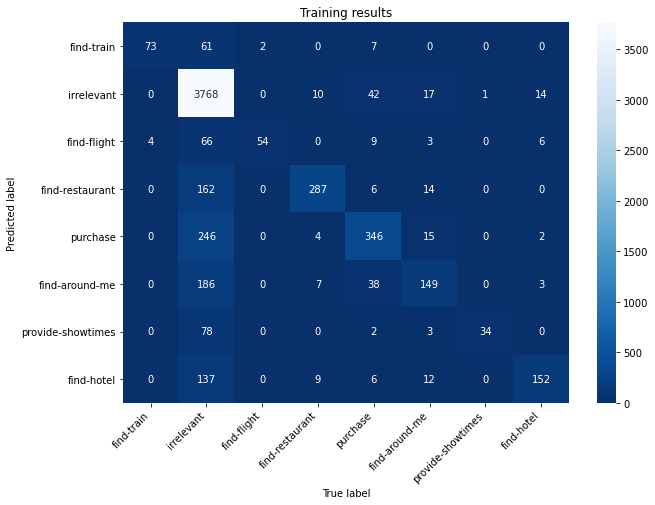

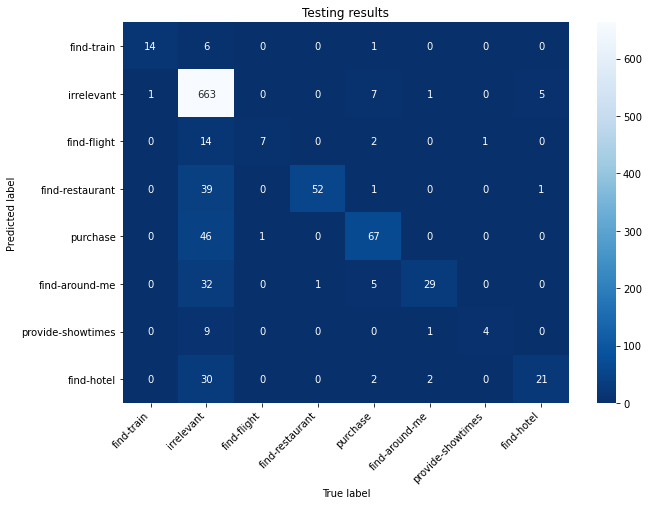

In [9]:
plot_confusion_matrix(trainig_metrics['cm'], 'Training results')
plot_confusion_matrix(testing_metrics['cm'], 'Testing results')